# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Ниже представленны данные до 2016 года.

Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats as st

In [60]:
games_data = pd.read_csv('/datasets/games.csv')
games_data.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10467,Imagine: Soccer Captain,DS,2009.0,Sports,0.10,0.00,0.00,0.01,NaN,tbd,E
8635,Bulletstorm,PC,2011.0,Shooter,0.07,0.07,0.00,0.02,82.0,7.7,M
16297,BattleForge,PC,2009.0,Strategy,0.00,0.01,0.00,0.00,75.0,7,T
8380,Jillian Michaels Fitness Ultimatum 2011,Wii,2010.0,Sports,0.16,0.00,0.00,0.01,NaN,tbd,E
9242,Monster Lab,DS,2008.0,Role-Playing,0.12,0.01,0.00,0.01,75.0,tbd,E10+
15000,Spy Hunter / Super Sprint,GBA,2005.0,Racing,0.02,0.01,0.00,0.00,NaN,NaN,NaN
10569,Conflict: Global Terror,XB,2005.0,Shooter,0.08,0.02,0.00,0.00,62.0,7.9,M
10729,Pajama Sam: Don't Fear The Dark,Wii,2008.0,Adventure,0.09,0.00,0.00,0.01,NaN,NaN,NaN
2642,Lips,X360,2008.0,Misc,0.12,0.56,0.00,0.10,71.0,7.4,T
9833,Dragon Quest Builders: Revive Alefgard,PS3,2016.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN


In [61]:
games_data.columns = games_data.columns.str.lower()
games_data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [62]:
games_data.shape

(16715, 11)

In [63]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [64]:
#games_data[games_data['rating'].isna()]['year_of_release'].value_counts()
games_data['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
FIFA 14                          9
Ratatouille                      9
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
Terraria                         8
LEGO Harry Potter: Years 5-7     8
Lego Batman 3: Beyond Gotham     8
Monopoly                         8
Madden NFL 08                    8
Name: name, dtype: int64

Проверим, есть ли в данных дубликаты:

In [65]:
games_data.duplicated().any()

False

## Подготовка данных

In [66]:
games_data.fillna({'name': ' ', 'genre': ' '}, inplace = True)

In [67]:
games_data['user_score'] = games_data['user_score'].replace('tbd', np.NaN)

In [68]:
games_data['year_of_release'].isna().sum()

269

In [69]:
for index in games_data[games_data['year_of_release'].isnull() == True].index:
    games_data['year_of_release'][index] = games_data.loc[games_data['name'] == games_data['name'][index],
                                                          'year_of_release'].max()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
games_data['year_of_release'].isna().sum()

146

In [71]:
games_data.dropna(subset = ['year_of_release'], inplace = True)
games_data['year_of_release'].isna().sum()

0

In [72]:
games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')
games_data['critic_score'] = games_data['critic_score'].astype('Int64')
games_data['user_score'] = games_data['user_score'].astype(float)

In [73]:
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']

In [74]:
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [75]:
games_data.shape

(16569, 12)

In [76]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 12 columns):
name               16569 non-null object
platform           16569 non-null object
year_of_release    16569 non-null Int64
genre              16569 non-null object
na_sales           16569 non-null float64
eu_sales           16569 non-null float64
jp_sales           16569 non-null float64
other_sales        16569 non-null float64
critic_score       8075 non-null Int64
user_score         7540 non-null float64
rating             9868 non-null object
total_sales        16569 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


## Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы и определим важны ли данные за все периоды. Для этого создадим сводную таблицу и построим график по количеству выпущенных игр по кажому году 

Text(0.5, 1.0, 'Количество игр выпущенных по каждому году')

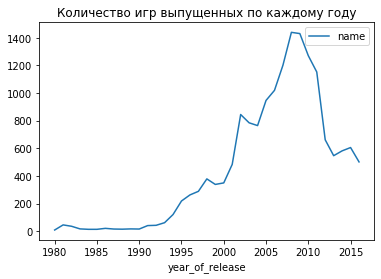

In [77]:
amount_games_by_year = games_data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

sns.lineplot(data=amount_games_by_year)
plt.title("Количество игр выпущенных по каждому году")

С 90-х годов заметен быстрый рост по количеству выпускаемых игр на консоли, компьютеры и приставки. В районе 2008-2009 гг происходит снижение количества выпскаемых компьютерных игр, это может быть связано с ростом популярности игр на мобильных устройсвах

Далее посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим график распределения по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы

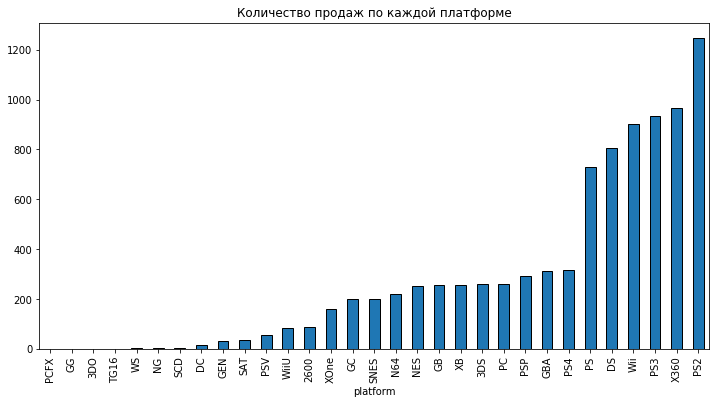

In [78]:
games_data.groupby('platform').sum()['total_sales'].sort_values().plot(x='platform', y="total_sales", kind='bar',
                        ec='black', title='Количество продаж по каждой платформе',figsize=(12,6))

Можем выделить 5 платформ с максимально высокими прожажами: DS, Wii, PS3, X360, PS2. Создадим отдельную таблицу по этим плтаформам и их продажам за весь период:

In [79]:
top_of_platforms = games_data.pivot_table(index='platform', values='total_sales',
                aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_of_platforms = top_of_platforms.reset_index()
top_of_platforms

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28


Возьмем данные начиная с 2000 годов, так как в этот период наблюдается значительный рост популрности видеоигр. Эти данные помогут построить прогноз на 2017 год. За выбранный период построим график по количеству продаж самых популярных игровых платформ:

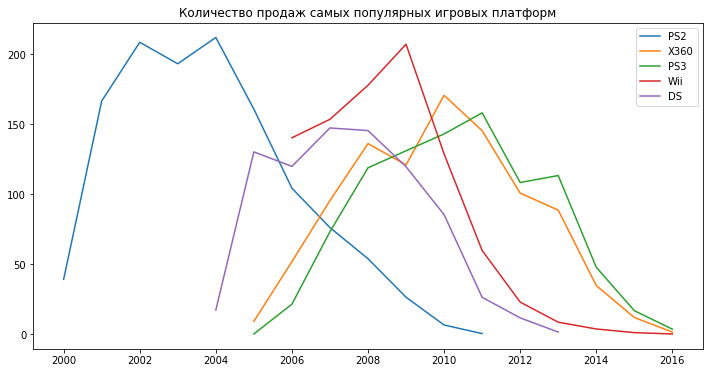

In [80]:
#создадим дф, в котором отберем данные за 2000 год и выше
games_data_2000= games_data[games_data['year_of_release']>=2000]

#создадим функцию, возвращающую таблицу общего количества продаж по определенной платформе за каждый год
def total_sales_for_platform_data(name, data):
    sample_games_data = games_data_2000[(games_data_2000['platform'] == name)]
    total_sales_for_platform_data = sample_games_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total_sales_for_platform_data

plt.figure(figsize=(12,6))
plt.title('Количество продаж самых популярных игровых платформ')
for i in list(top_of_platforms['platform']):
    sns.lineplot(data=total_sales_for_platform_data(i,games_data_2000)['total_sales'], label=i)
    plt.legend()


Вывод по каждой платформе исходя из графика:

- примерно через 5 лет после выхода приставки наступает пик продаж
- самыми продаваемыми платформами можно считать PS3 и XBOX, их популярность длилась дольше остальных
- в 2008 заметно снижение продаж по платформе DS
- платформа Wii с 2006 по 2009 имела высокую популярность, но после 2009 года заметен резкий провал

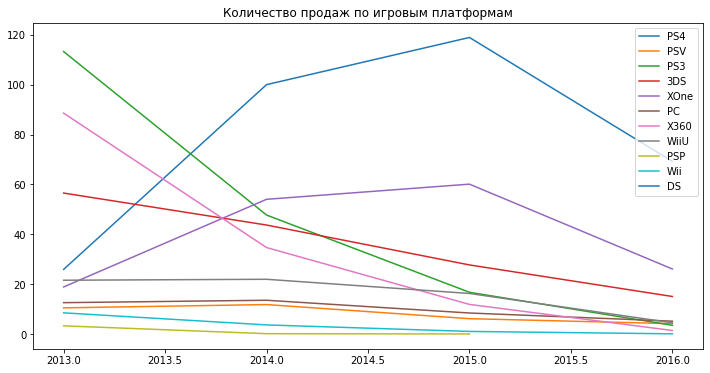

In [119]:
games_data_2013= games_data[games_data['year_of_release']>=2013]
list_of_platform = games_data_2013['platform'].value_counts().index

def total_sales_for_platform_data_2(name, data):
    sample_games_data = data[(data['platform'] == name)]
    total_sales_for_platform_data = sample_games_data.pivot_table(index='year_of_release', values='total_sales',
                                                aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total_sales_for_platform_data

plt.figure(figsize=(12,6))
plt.title('Количество продаж по игровым платформам')
for i in list_of_platform:
    sns.lineplot(data=total_sales_for_platform_data_2(i,games_data_2013)['total_sales'], label=i)
    plt.legend()


In [120]:
list_of_platform

Index(['PS4', 'PSV', 'PS3', '3DS', 'XOne', 'PC', 'X360', 'WiiU', 'PSP', 'Wii',
       'DS'],
      dtype='object')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


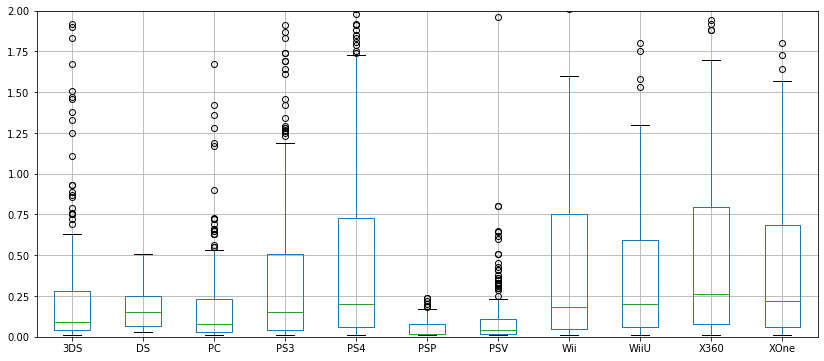

In [121]:
list_of_platform = ['PS4', 'PSV', 'PS3', '3DS', 'XOne', 'PC', 'X360', 'WiiU', 'PSP', 'Wii','DS']
fig,ax = plt.subplots(figsize=(14,6))
games_data_2006.query('platform == @list_of_platform').pivot_table(values='total_sales', index='name',
                                                 columns='platform').boxplot(ax=ax, grid=True)
ax.set_ylim(0,2)
plt.show()

Исходя из грфиков заметно разное распределение медианы по каждой плтформе, продажи по платформам PS4, X360 и Wii - больше всех,меньше всех - у PSP, PSV.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, возьмем платформу PS4. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Text(0.5, 1.0, 'Диаграмма рассеяния по оценкам пользователей ')

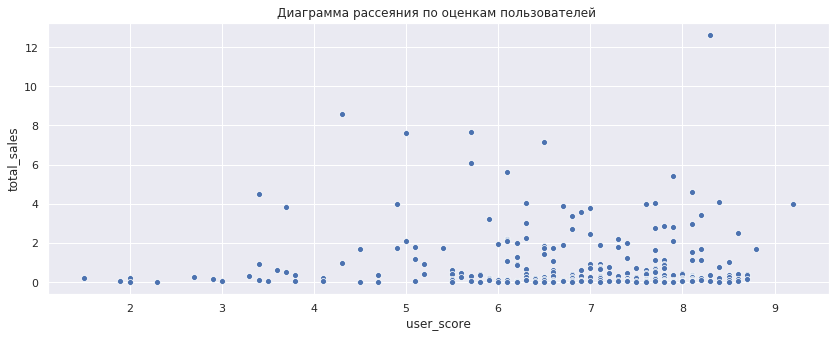

In [141]:
PS4 = games_data_2013[games_data_2013['platform']=='PS4']
plt.figure(figsize=(14,5))
sns.scatterplot(x='user_score', y='total_sales', data=PS4)
plt.title('Диаграмма рассеяния по оценкам пользователей ')

Text(0.5, 1.0, 'Диаграмма рассеяния по оценкам критиков ')

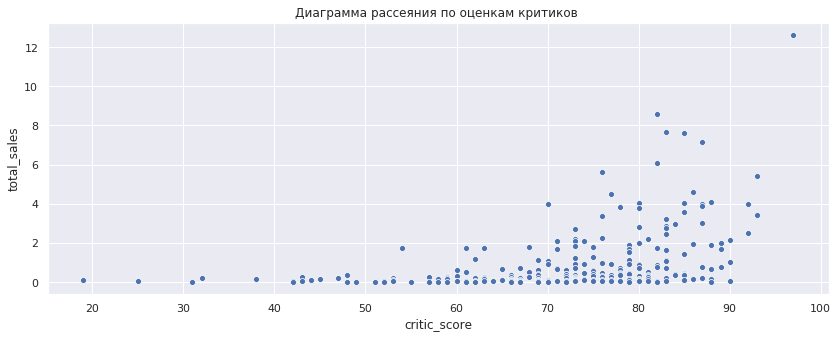

In [142]:
PS4 = games_data_2013[games_data_2013['platform']=='PS4']
plt.figure(figsize=(14,5))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4)
plt.title('Диаграмма рассеяния по оценкам критиков ')

In [143]:
PS3[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


Заметная корреляция между продажами по данной платформе наблюдается по оценке критиков, от оценки пользователей количество продаж зависит меньше. Но есть большая корреляция между оценками пользователей и оценками критиков, что очень интересно)

In [144]:
list_of_platform

['PS4', 'PSV', 'PS3', '3DS', 'XOne', 'PC', 'X360', 'WiiU', 'PSP', 'Wii', 'DS']

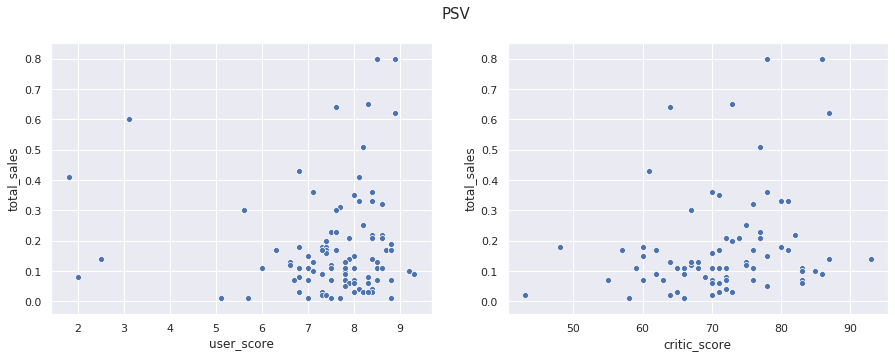

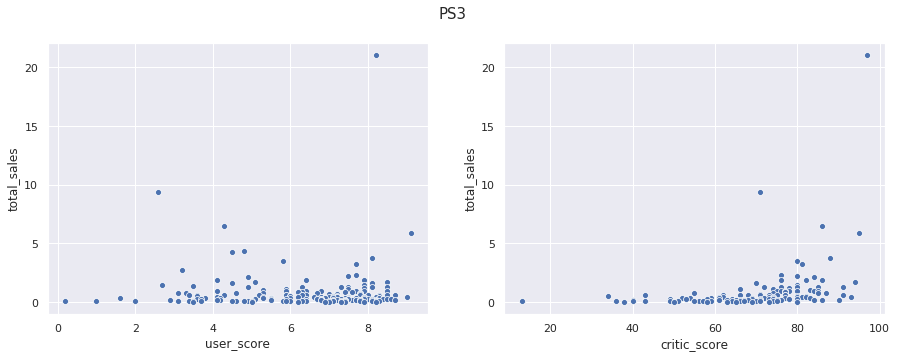

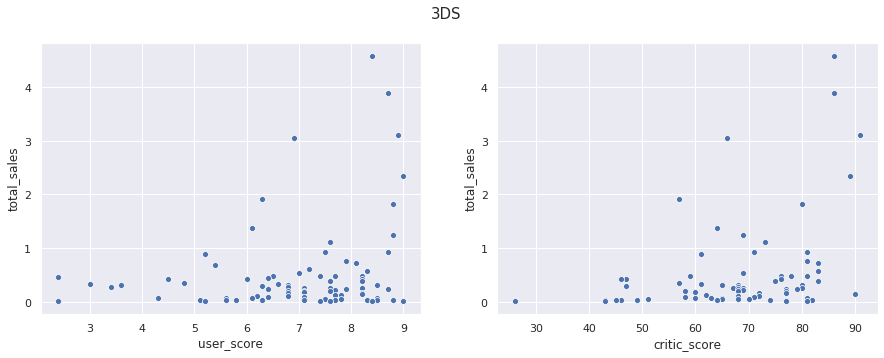

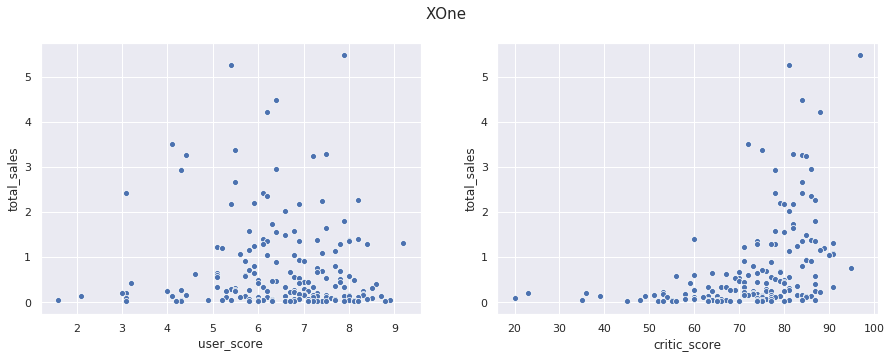

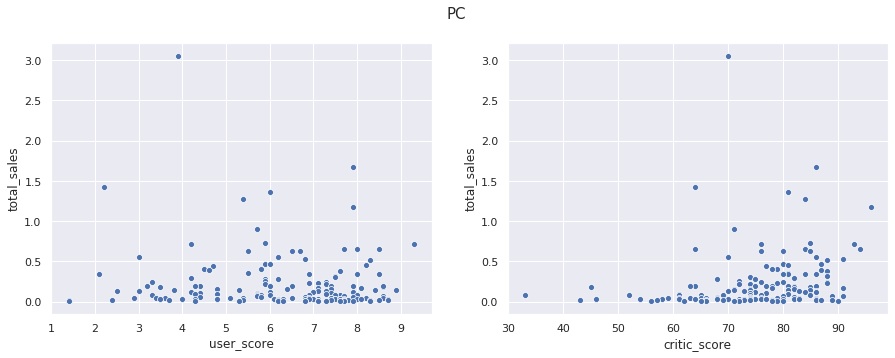

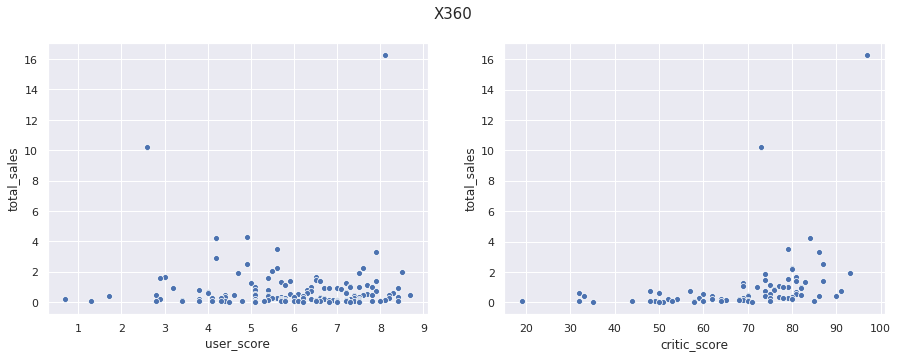

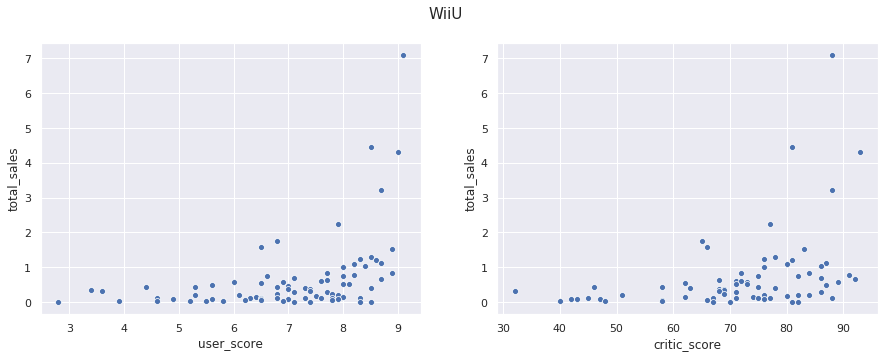

In [146]:
def scatterplot_for_other_platform(name):
    platform = games_data_2013[games_data_2013['platform']==name]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name, fontsize=15)
    
#беру все платформы кроме первой (пс4) и  посдлених двух, по ним очень малло данных и трудно строить рассеивание и корреляцию    
for platform in list_of_platform[1:-3]:
    scatterplot_for_other_platform(platform)

In [147]:
for platform in list_of_platform[1:-3]:
    corr_table = games_data_2013[games_data_2013.platform == platform][['total_sales', 'critic_score', 'user_score']].corr()
    print('Корреляция между оценками пользователей и критиков и продажами платформе', platform)
    print()
    print(corr_table)
    print()

Корреляция между оценками пользователей и критиков и продажами платформе PSV

              total_sales  critic_score  user_score
total_sales      1.000000      0.254742    0.000942
critic_score     0.254742      1.000000    0.611521
user_score       0.000942      0.611521    1.000000

Корреляция между оценками пользователей и критиков и продажами платформе PS3

              total_sales  critic_score  user_score
total_sales      1.000000      0.334285    0.002394
critic_score     0.334285      1.000000    0.599920
user_score       0.002394      0.599920    1.000000

Корреляция между оценками пользователей и критиков и продажами платформе 3DS

              total_sales  critic_score  user_score
total_sales      1.000000      0.357057    0.241504
critic_score     0.357057      1.000000    0.769536
user_score       0.241504      0.769536    1.000000

Корреляция между оценками пользователей и критиков и продажами платформе XOne

              total_sales  critic_score  user_score
total_sa

Заметно, что продажи по остальным платформам в большей степени зависят от оценки критиков, а оценка пользователей влияет в меньшей степени, так как корреляция по оценкам критиков больше

Теперь посмотрим на общее распредление игр по жанрам. Сделаем выводы о самых прибыльных жанрах и определим, выделяются ли жанры с высокими и низкими продажами

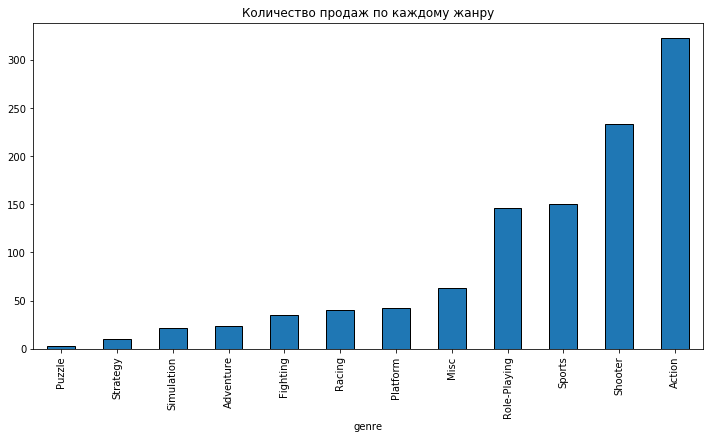

In [133]:
games_data_2013.groupby('genre').sum()['total_sales'].sort_values().plot(x='genre', y="total_sales", kind='bar',
                        ec='black', title='Количество продаж по каждому жанру',figsize=(12,6))

Жанр Action находится на первом месте по продажам среди остальных жанров, 2 и 3 место забирают жанры sports и shooter. Strategy находится на последнем месте по количеству продаж

In [135]:
genres = games_data_2013['genre'].value_counts().index

In [136]:
for genre in genres:
    print('Медиана продаж игр по жанру',genre,':',
          round(games_data_2013[games_data_2013['genre']==genre]['total_sales'].median(),2))

Медиана продаж игр по жанру Action : 0.11
Медиана продаж игр по жанру Role-Playing : 0.12
Медиана продаж игр по жанру Adventure : 0.03
Медиана продаж игр по жанру Sports : 0.24
Медиана продаж игр по жанру Shooter : 0.45
Медиана продаж игр по жанру Misc : 0.1
Медиана продаж игр по жанру Racing : 0.12
Медиана продаж игр по жанру Fighting : 0.12
Медиана продаж игр по жанру Platform : 0.22
Медиана продаж игр по жанру Simulation : 0.1
Медиана продаж игр по жанру Strategy : 0.08
Медиана продаж игр по жанру Puzzle : 0.06


### Общий вывод по исследовательскому анализу данных

- С 90-х годов заметен быстрый рост по количеству выпускаемых игр на консоли, компьютеры и приставки. В районе 2008-2009 гг происходит снижение количества выпскаемых компьютерных игр, это может быть связано с ростом популярности игр на мобильных устройсвах
- По результатам исследования было выделено 5 платформ с максимально высокими прожажами: DS, Wii, PS3, X360, PS2. Наиболее полпулярны игры на Sony Playstation 3 и Xbox 360
- У всех платформ наблюдается взаимосвязь между оценками критиков и пользователей и продажами. Корреляция более заметна между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей
- Из общего распределения продаж игр по жанрам выяснили, что жанр Action находится на первом месте по продажам среди остальных жанров, 2 и 3 место забирают жанры sports и shooter. Strategy находится на последнем месте по количеству продаж, что странно, так как этот жанр довольно популярный, по крайней мере должен быть популярнее пазлов :) Возможно до 2016 года этот жанр игр еще не "распробовали"
- Наиболее высокие медианы продаж имеют игры жанра Shooter (0.45), Sports (0.24) и Platform (0.22), так что выбирая жанр, который продается лучше, в приоритет можно поставить - Shooter, Sports и Platform
- Исходя из проделанного исследования, можем сказать, что для 2017 года большую часть прибыли будут приносить игры жанра Shooter, Sports и Action, для платформ Sony Playstation4 и Xbox One

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5)
- самые популярные жанры (топ-5)
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [137]:
def portrait_of_regions(row):
    for column in list(['platform','genre','rating']):
        portrait_of_regions = games_data_2013.pivot_table(index=column, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().head(5)
        portrait_of_regions['ratio'] = round(portrait_of_regions[row] / portrait_of_regions[row].sum(), 2)
        print(portrait_of_regions)
        print() 
        sns.barplot(data=portrait_of_regions, x=column, y=row)
        
        
    
        plt.show()
        sns.set()

Портрет для пользователей из Северной Америки. Топ 5 платформ, жанров и рейтингов за весь период:

  platform  na_sales  ratio
0      PS4    108.74   0.28
1     XOne     93.12   0.24
2     X360     81.66   0.21
3      PS3     63.50   0.16
4      3DS     38.20   0.10



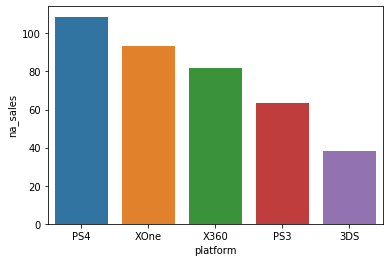

          genre  na_sales  ratio
0        Action    126.13   0.34
1       Shooter    109.74   0.29
2        Sports     65.27   0.17
3  Role-Playing     46.40   0.12
4          Misc     27.49   0.07



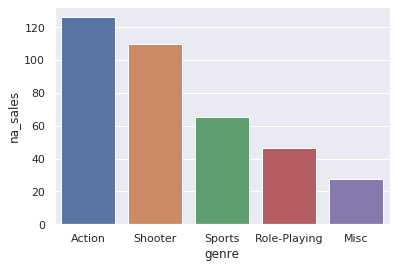

  rating  na_sales  ratio
0      M    165.29   0.47
1      E     79.05   0.23
2   E10+     54.24   0.16
3      T     49.79   0.14



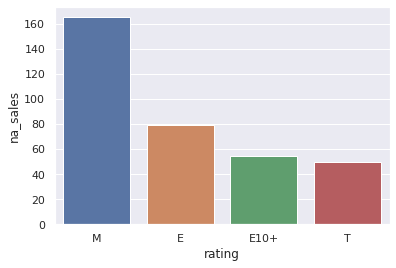

In [138]:
portrait_of_regions('na_sales')

Портрет для пользователей из Европейского Союза. Топ 5 платформ, жанров и рейтингов за весь период:

  platform  eu_sales  ratio
0      PS4    141.09   0.42
1      PS3     67.81   0.20
2     XOne     51.59   0.15
3     X360     42.52   0.13
4      3DS     30.96   0.09



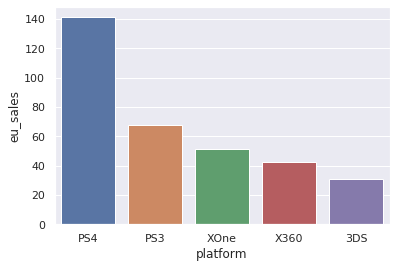

          genre  eu_sales  ratio
0        Action    118.61   0.37
1       Shooter     87.86   0.27
2        Sports     60.52   0.19
3  Role-Playing     36.97   0.11
4        Racing     20.19   0.06



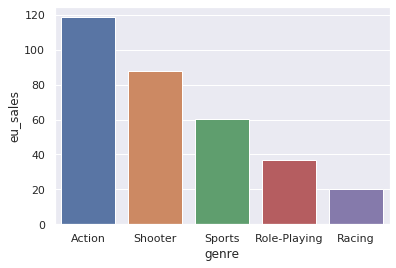

  rating  eu_sales  ratio
0      M    145.80   0.46
1      E     83.36   0.27
2   E10+     42.69   0.14
3      T     41.95   0.13



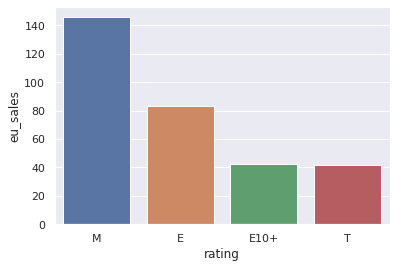

In [139]:
portrait_of_regions('eu_sales')

Портрет для пользователей из Японии. Топ 5 платформ, жанров и рейтингов за весь период:

  platform  jp_sales  ratio
0      3DS     67.81   0.50
1      PS3     23.35   0.17
2      PSV     18.59   0.14
3      PS4     15.96   0.12
4     WiiU     10.88   0.08



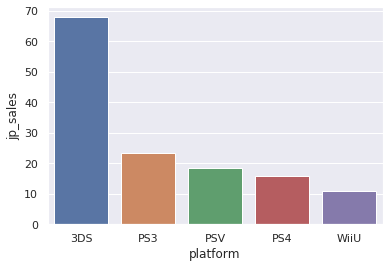

          genre  jp_sales  ratio
0  Role-Playing     51.04   0.44
1        Action     40.49   0.35
2          Misc      9.44   0.08
3      Fighting      7.65   0.07
4       Shooter      6.61   0.06



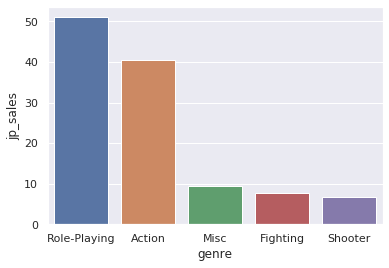

  rating  jp_sales  ratio
0      T     20.59   0.37
1      E     15.14   0.27
2      M     14.11   0.25
3   E10+      5.89   0.11



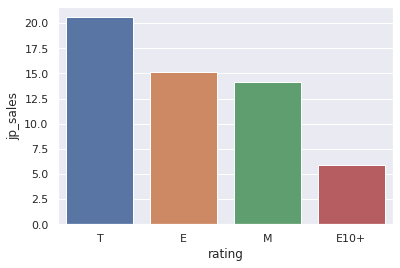

In [140]:
portrait_of_regions('jp_sales')

### Вывод по составлению портрета пользователя каждого региона:

##### Cеверная америка
- Самые популярные игровые платформы: XBOX, PS2, WII, PS3, DS 
- Топ 5 жанров в северной америке : action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом  «Подросткам 13—19 лет» и на третьем месте игры с рейтингом «От 17 лет»

##### Европейский Союз
- Самые популярные игровые платформы: PS2, PS3, X360, WII, PS 
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc 
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом «Подросткам 13—19 лет»

##### Япония
- Самые популярные игровые платформы: DS, PS, PS2, SNES, 3DS 
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc 
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом  «Подросткам 13—19 лет» и на третьем месте игры с рейтингом «От 17 лет»

На первом месте по общий сумме продаж занимает платформа X360. По результатам анализа заметно, что Япония немного выделяется списком топ-5 платформ (DS, PS - первое,второе место, хотя в других регионах эти платформы занимают 5ое место)- это говорит о том, что рынок в Японии кардинально отличается от рынков ЕС и Северной Америки. Также можем заметить,что в продажи в Японии меньше, чем у других регионов. На втором месте идут продажи в ЕС и на первом месте продажи в СА. 

Но не смотря на то, что продажи в Японии значительно меньше, чем в других регионах, доля продаж по самой популярной платформе выше даже, чем доля продаж XBOX в Северной Америке. Доля продаж по жанрам и рейтингу у Японии так же немного выше, чем у СА и ЕС. Самый популярный рейтинг для всех регионов - Е «для всех», по количеству продажи игр с этим рейтином значительно выше, соответственно можем сделать вывод, что рейтинг влияет на количество продаж в отлельном регионе.

## Проверка гипотез

Гипотеза №1.

- 𝐻0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

- 𝐻1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.

- 𝛼=1%


In [37]:
xone = games_data_2006.query('platform == "XOne"')['user_score']
pc = games_data_2006.query('platform == "PC"')['user_score']

alpha = .01

results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.008603496501781193
Отвергаем нулевую гипотезу


In [38]:
xone_pc = games_data.query('platform == "XOne" or platform == "PC"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,7.067363
XOne,6.521429


Гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC пришлось отвергнуть, средние пользовательские рейтинги платформы PC выше, чем рейтинги платформы Xbox One. При выборе продвижения игры по платформам можно склоняться к выбору PC

Гипотеза №2.

- 𝐻0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

- 𝐻1  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

- 𝛼=1%

In [39]:
action = games_data_2006.query('genre == "Action"')['user_score']
sports = games_data_2006.query('genre == "Sports"')['user_score']

alpha = .01

results = st.ttest_ind(action.dropna(), sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.759403504326082e-10
Отвергаем нулевую гипотезу


In [40]:
action_sports = games_data_2006.query('genre == "Action" or genre == "Sports"')
action_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.881013
Sports,6.418622


Статистический анализ показал, что средние пользовательские рейтинги жанров Action и Sports не равны, пользовательские рейтнги по жанру Action больше, чем у Sports.  Вторая гипотеза не подтвердилась. 

## Общий вывод

- Подготовили данные к  анлизу и расчетам. Привели необходимые столбцы к нужному типу и обработали пропуски. Пустые значения в столбцах critic_score, user_score и rating оставили без изменений, так как заменив эти данные мы рисковали снизить точность анализа
- С 90-х годов заметен быстрый рост по количеству выпускаемых игр на консоли, компьютеры и приставки. В районе 2008-2009 гг происходит снижение количества выпскаемых компьютерных игр, это может быть связано с ростом популярности игр на мобильных устройсвах
- По результатам исследования было выделено 5 платформ с максимально высокими прожажами: DS, Wii, PS3, X360, PS2. Наиболее полпулярны игры на Sony Playstation 3 и Xbox 360
- У всех платформ наблюдается взаимосвязь между оценками критиков и пользователей и продажами. Корреляция более заметна между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей
- Определили, что жанр Action находится на первом месте по продажам среди остальных жанров, 2 и 3 место забирают жанры sports и shooter. Strategy находится на последнем месте по количеству продаж

#### Составили портрет пользователя каждого региона:
##### Cеверная америка
- Самые популярные игровые платформы: XBOX, PS2, WII, PS3, DS 
- Топ 5 жанров в северной америке : action, sports, shooter, platform, misc
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом  «Подросткам 13—19 лет» и на третьем месте игры с рейтингом «От 17 лет»

##### Европейский Союз
- Самые популярные игровые платформы: PS2, PS3, X360, WII, PS 
- Топ 5 жанров в Европе : action, sports, shooter, racing, misc 
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом "от 17 и выше" и на третьем месте игры с рейтингом «Подросткам 13—19 лет»

##### Япония
- Самые популярные игровые платформы: DS, PS, PS2, SNES, 3DS 
- Топ 5 жанров в Японии : Role-Playing, action, sports, platform, misc 
- По рейтингам видно, что больше всего продаж у игр с рейтингом «для всех», на втором месте игры с рейтингом  «Подросткам 13—19 лет» и на третьем месте игры с рейтингом «От 17 лет»

Наиболее высокие медианы продаж имеют игры жанра Shooter (0.29), Sports (0.2) и Action (0.17), так что выбирая жанр, который продается лучше, в приоритет можно поставить - Shooter, Sports и Action

Но не смотря на то, что продажи в Японии значительно меньше, чем в других регионах, доля продаж по самой популярной платформе в Японии выше даже, чем доля продаж XBOX в Северной Америке. Доля продаж по жанрам и рейтингу у Японии так же немного выше, чем у СА и ЕС. Самый популярный рейтинг игр для всех регионов - Е «для всех», по количеству продажи игр с этим рейтином значительно выше, соответственно можем сделать вывод, что рейтинг влияет на количество продаж в отлельном регионе.


#### Произвели проверку гипотез:
- Гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC пришлось отвергнуть, средние пользовательские рейтинги платформы PC выше, чем рейтинги платформы Xbox One. При выборе продвижения игры по платформам можно склоняться к выбору PC
- Касаемо второй гипотезы о равенстве пользовательских рейтингов жанров Action и Sports - статистический анализ показал, что средние пользовательские рейтинги жанров Action и Sports не равны, пользовательская оценка по жанру Action больше, чем у жанра Sports


Исходя из проделанного исследования, можем сказать, что для 2017 года большую часть прибыли будут приносить игры жанра Shooter, Sports и Platform, для платформ Sony Playstation 4 и Xbox One  с рейтингом «для всех»